# Анализ данных по рынку игр

Необходимо провести анализ рынка видеоигр для интернет-магазина «Стримчик», который занимается продажей компьютерных игр по всему миру, чтобы помочь спланировать рекламную кампанию на 2017 год и сделать ставку на успешный продукт. Из открытых источников нам доступны исторические данные (до 2016 года) о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

# Введение

**Проект направлен** на исследовательский анализ данных рынка видеоигр и проверку сформулированных гипотез для помощи бизнесу.

**Цель исследования**

Составить портрет пользователя NA, EU, JP:

* Определить самые популярные платформы (топ-5);
* Определить самые популярные жанры (топ-5);
* Выяснить, влияет ли рейтинг ESRB на продажи в отдельном регионе.

Проверить 2 гипотезы:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action и Sports разные.

**Описание исходных данных:**

games.csv:
    
* *Name* — название игры
* *Platform* — платформа
* *Year_of_Release* — год выпуска
* *Genre* — жанр игры
* *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
* *EU_sales* — продажи в Европе (миллионы проданных копий)
* *JP_sales* — продажи в Японии (миллионы проданных копий)
* *Other_sales* — продажи в других странах (миллионы проданных копий)
* *Critic_Score* — оценка критиков (максимум 100)
* *User_Score* — оценка пользователей (максимум 10)
* *Rating* — рейтинг от организации ESRB.

**Исследование пройдет в 5 основных этапов:**

 * Обзор исходных данных;
 * Предобработка исходных данных;
 * Исследовательский анализ данных;
 * Составление портрета пользователя;
 * Проверка гипотез.

<a id='Содержание'></a>
# Содержание

1. [Обзор исходных данных](#Обзор-исходных-данных)
2. [Предобработка данных](#Предобработка-данных)
3. [Исследовательский анализ данных](#Исследовательский-анализ-данных)
    * [Выпуск игр по годам](#Выпуск_игр_по_годам)
    * [Продажи по платформам](#Продажи_по_платформам)
    * [Определение актуального периода](#Определение_актуального_периода)
    * [Потенциально прибыльные платформы](#Потенциально_прибыльные_платформы)
    * [Бокс-плот мировых продаж по платформам](#Бокс-плот_мировых_продаж_по_платформам)
    * [Корреляция оценок и продаж](#Корреляция_оценок_и_продаж)
    * [Распределение игр по жанрам](#Распределение_игр_по_жанрам)
4. [Портрет пользователя](#Портрет-пользователя)
    * [Самые популярные платформы (топ-5)](#Самые_популярные_платформы)
    * [Самые популярные жанры (топ-5)](#Самые_популярные_жанры)
    * [Влияние рейтинга ESRB на продажи в отдельном регионе](#Влияние_ESRB)
5. [Проверка гипотез](#Проверка-гипотез)
    * [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#Гипотеза_1)
    * [Средние пользовательские рейтинги жанров Action и Sports разные](#Гипотеза_2)
6. [Общий вывод](#Общий-вывод)

<a id='Обзор-исходных-данных'></a>
## Обзор исходных данных

In [1]:
%%capture
#устанавливаем инструмент для визуализации пропусков
!pip install missingno
#импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import missingno as msno

In [2]:
#читаем датасет
df = pd.read_csv('/datasets/games.csv')
#выводим информацию по нему
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Перед нами первые строки нашего датафрейма. Сразу отметим наличие пропусков в различных рейтингах, названия столбцов с заглавной буквы.

Посмотрим более детально:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим пропуски не только по рейтингам, но и в *Year_of_Release*, *Genre*, *Name*. Также необходимо изменить тип данных в *Year_of_Release* с float на int (так будет логичнее для года издания), в *User_Score* с object на float.

Визуализируем пропуски для наглядности: 

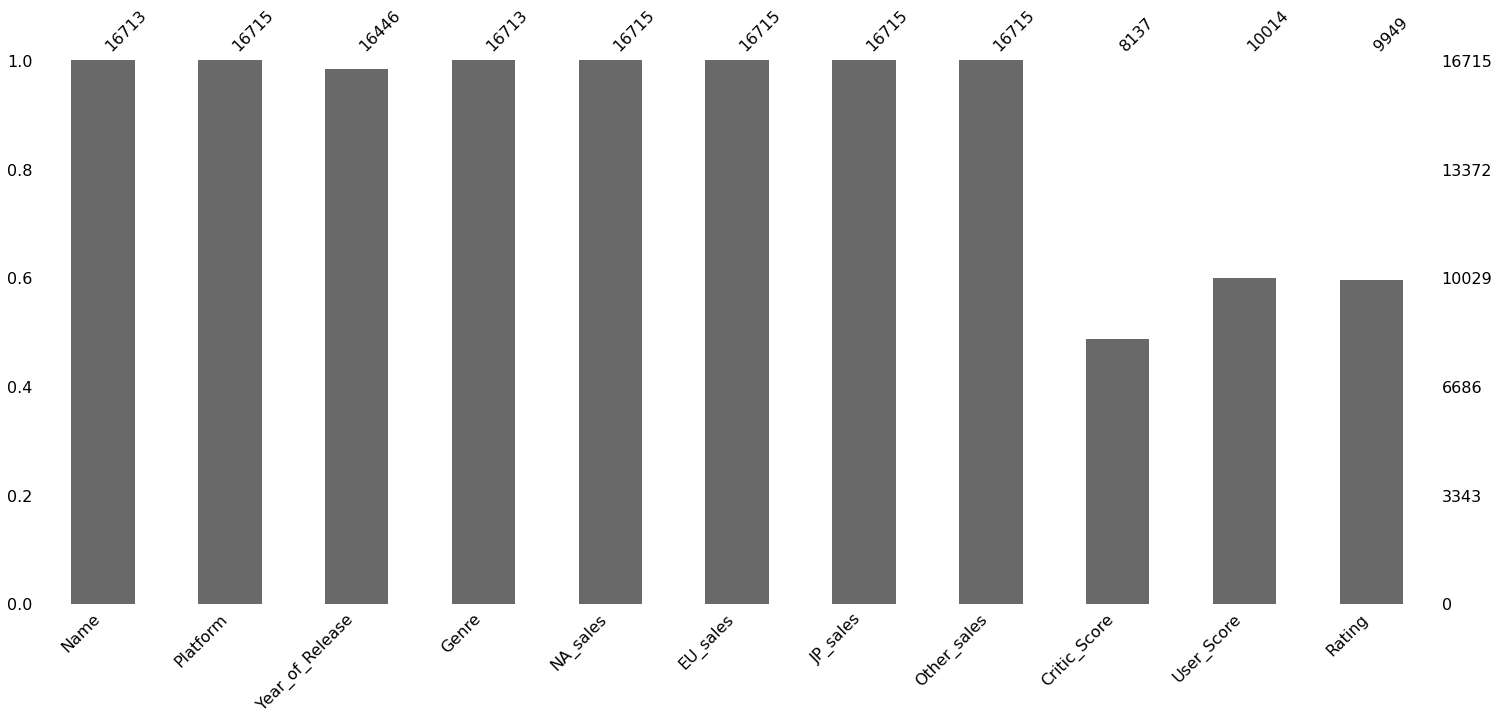

In [4]:
msno.bar(df)
plt.show()

Пропуски в рейтингах ощущаются больше всего: около 50% строк.

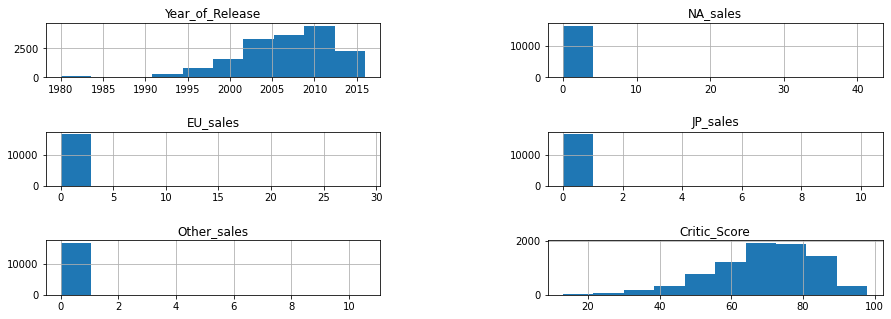

In [5]:
df.hist(figsize=(15, 5))
plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Никаких аномалий, на первый взгляд, в числовых значениях нет, отметим наличие игр 80х годов в датасете.

**Вывод:**

Мы провели первичный обзор данных и выявили необходимость предобратки, которая обязательно будет включать в себя преобразование типа данных и устранение пропусков.

[Вернуться к содержанию](#Содержание)

<a id='Предобработка-данных'></a>
## Предобработка данных

Сначала исправим недостатки датасета, которые уже нашли.

In [7]:
#приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Решим, что делать с пропусками:

Считаю, что допустимо избавиться от строк с пропусками в столбцах *name*, *year_of_release*, *genre* - их сравнительно немного, также их невозможно восполнить без значительной потери качества данных.

In [8]:
#удалим строки с пропусками в нужных столбцах
df = df.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


С пропусками в рейтингах сложнее, рассмотрим значения столбцов детальнее:

In [9]:
#выведем уникальные значения столбцов critic_score, user_score, rating
col_list = ['critic_score', 'user_score', 'rating']
for k in col_list:
    print(f'Уникальные значения {k}:', df[k].sort_values().unique())

Уникальные значения critic_score: [13. 17. 19. 20. 21. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. nan]
Уникальные значения user_score: ['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]
Уникальные значения rating: ['A

Видим, что в *user_score* есть значения tbd (to be defined/to be described, те же NAN для нас, только object типом), которые также мешают преобразованию типа данных столбца. В *rating*, тип данных которого object, как раз пропущенные значения можно заменить на tbd.

In [10]:
#работаем со значением tbd в столбцах
df.loc[df['user_score']=='tbd', 'user_score'] = np.nan
df['rating'] = df['rating'].fillna('tbd')
col_list = ['user_score', 'rating']
for k in col_list:
    print(f'Уникальные значения {k}:', df[k].sort_values().unique())

Уникальные значения user_score: ['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' nan]
Уникальные значения rating: ['AO' 'E' 'E10+' 'EC' 'K-A' 'M' 'RP' 'T' 'tbd']


Сами пропуски в рейтингах могли возникнуть по причине недостаточного количества оценок на соответствующих ресурсах или возможного остуствия внимания со стороны определенного типа сообщества, и заполнить их объективными значениями не представляется возможным, поэтому оставим их как есть. 

После исправления значений можем изменить тип данных в столобцах *user_score* и *year_of_release*:

In [11]:
df['user_score'] = df['user_score'].astype(float)
df['year_of_release'] = df['year_of_release'].astype(int)
print('Тип данных user_score:', df['user_score'].dtype)
print('Тип данных year_of_release:', df['year_of_release'].dtype)

Тип данных user_score: float64
Тип данных year_of_release: int64


Проверим датафрейм на явные дубликаты:

In [12]:
print('Количество явных дубликатов:', sum(df.duplicated()))

Количество явных дубликатов: 0


И отдельно по совпадениям сразу в трех столбцах: *name*, *platform*, *year_of_release*

In [13]:
df[df[['name', 'platform', 'year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Видим, что есть 1 совпадающая строка по 3м столбцам - удалим вторую, так как она содержит меньше данных о продукте.

In [14]:
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first').reset_index(drop=True)
df[df[['name', 'platform', 'year_of_release']].duplicated(keep=False)].count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Явных дубликатов теперь нет, неявные дубликаты у нас еще могут быть в столбцах *name* и *platform*, однако, исходя из природы данных и количества строк, нецелесообразно тратить время на их поиск, учитывая, что имена игр могут также дублироваться для разных платформ, у которых, в свою очередь несколько версий. 

Для дальнейшего анализа добавим в датафрейм столбец с суммой продаж во всех регионах:

In [15]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,tbd,31.38


Проверим, как преобразился датафрейм после предобработки:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Типы данных в порядке.

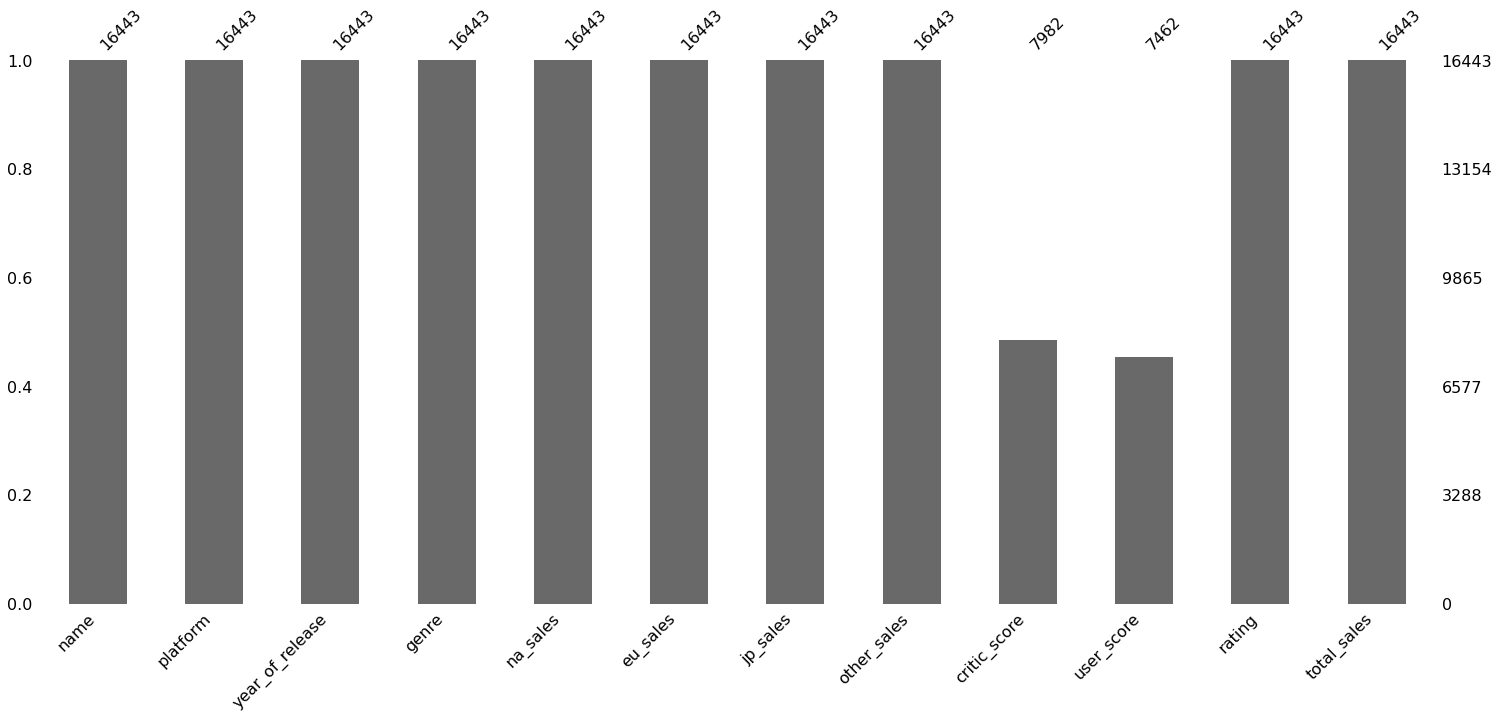

In [17]:
msno.bar(df)
plt.show()

Наглядно: пропуски остались только в оценках критиков и игроков. 

**Вывод:**

Мы провели предобработку данных:

* Названия столбцов приведены к нижнему регистру;
* Удалены пропуски в столбцах *name*, *year_of_release*, *genre*;
* Значения "tbd" в *user_score* изменены на NAN для преобразования типа данных столбца в float;
* Значения NAN в *rating* изменены на "tbd" для категоризации в столбце и устранения пропущенных значений;
* Типы данных датафрейма приведены в норму;
* Устранены дубликаты;
* Создан столбец *total_sales* - сумма продаж по всем регионам по продукту.

[Вернуться к содержанию](#Содержание)

<a id='Исследовательский-анализ-данных'></a>
## Исследовательский анализ данных

<a id='Выпуск_игр_по_годам'></a>
Посмотрим сколько игр выпускалось в разные годы:

In [18]:
#формируем сводную таблицу: количество релизов по годам
df_games_per_year = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
df_games_per_year = df_games_per_year.rename(columns={'name':'num'})
#добавим столбец с долей в процентах от общего количества игр в нашем датасете
df_games_per_year['part_all_games'] = (df_games_per_year['num']/df_games_per_year['num'].sum()*100).round(2)
df_games_per_year

,num,part_all_games
year_of_release,,
1980,9,0.05
1981,46,0.28
1982,36,0.22
1983,17,0.10
1984,14,0.09
1985,14,0.09
1986,21,0.13
1987,16,0.10
1988,15,0.09


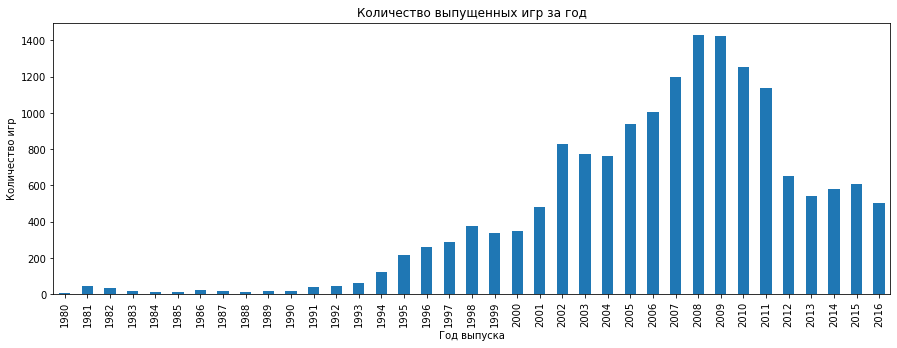

In [19]:
#построим график выпуска игр по годам
df_games_per_year['num'].plot(kind='bar', figsize=(15,5))
plt.title('Количество выпущенных игр за год')
plt.ylabel('Количество игр')
plt.xlabel('Год выпуска')
plt.show()

Видим правостороннее распределение с хвостом слева, пик количества выпущенных игр приходится на 2008-2009 года, рост количества игр начинается с 1994, а после 2011 количество заметно падает и держится практически равномерно.

Рост в 1994 связан, на первый взгляд, с развитием индустрии и инвестиций в нее, распростанением ПК, консолей и других платформ, в 2012 количество релизов заметно снизилось из-за подорожания разработки и, возможно, смещению класса игр ближе к ААА, а также внедрения сервисного элемента в игры, благодаря которому игры приносят доход издателю в течение более продолжительного времени. 

Считаю, что данные по играм до 2000 года представляют для нас меньшую ценность, так как индустрия тогда была построена скорее на энтузиазме разработчиков, коммерческий успех часто не являлся самым важным фактором, кроме того, размах исследования в 36 лет - слишком большой, а аудитория, как и ее предпочтения, меняются практически каждые 10 лет. 

<a id='Продажи_по_платформам'></a>
Выясним, как менялись продажи по платформам спустя года:

In [20]:
#выявим платформы с наибольшими суммарными продажами
df_platforms_total_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
df_platforms_total_sales

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Возьмем первые 5 платформ по суммарным продажам и построим распределение по годам:

In [21]:
#сделаем срез необходимых платформ
plat_list = df_platforms_total_sales.loc[0:4, 'platform'].tolist()
plat_list

['PS2', 'X360', 'PS3', 'Wii', 'DS']

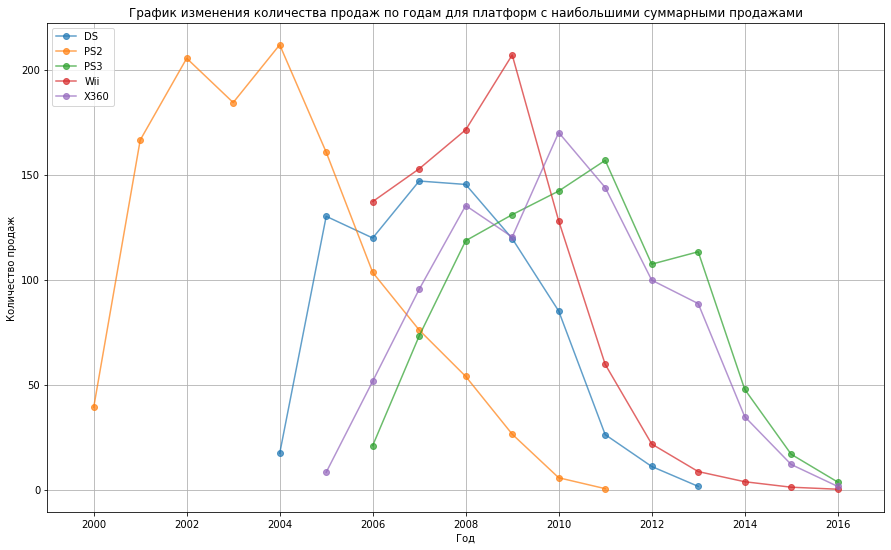

In [22]:
#отфильтруем датафрейм по платформам
df_plat_filtered = df[df['platform'].isin(plat_list)]
#создаем сводную таблицу на основе этих платформ для графика
df_plat_games_year = df_plat_filtered.pivot_table(index='year_of_release', columns='platform', values='total_sales',\
                                                  aggfunc='sum')
#строим график распределения продаж по годам
df_plat_games_year.plot(style='-o', grid=True, figsize=(15,9), alpha=0.7)
plt.xlim(1999, 2017) #устанавливаем границы для лучшей читаемости
plt.title('График изменения количества продаж по годам для платформ с наибольшими суммарными продажами')
plt.ylabel('Количество продаж')
plt.xlabel('Год')
plt.legend(loc='upper left')
plt.show()

По графику видно, что "срок жизни" успешной платформы составляет около 10 лет.

<a id='Определение_актуального_периода'></a>
Определим данные за какой период мы можем считать актуальными для прогноза на 2017 год:

Исходя из вывода по количеству выпущенных игр на платформе и по графику популярности платформ, самый логичный вариант - это взять период в 10 лет, 2006-2016, однако, для точности исследования в текущих реалиях возьмем период в 3 года: 2013-2016, таким образом, мы можем быть уверены, что:

* Самые популярные платформы входят в наш "актуальный период";
* Учитывается современная аудитория и ее предпочтения.

**Далее мы будем использовать только актуальный для нас период: 2013-2016** 

In [23]:
#объявим переменную с отсортированными значениями по году
df_actual = df[df['year_of_release']>=2013]

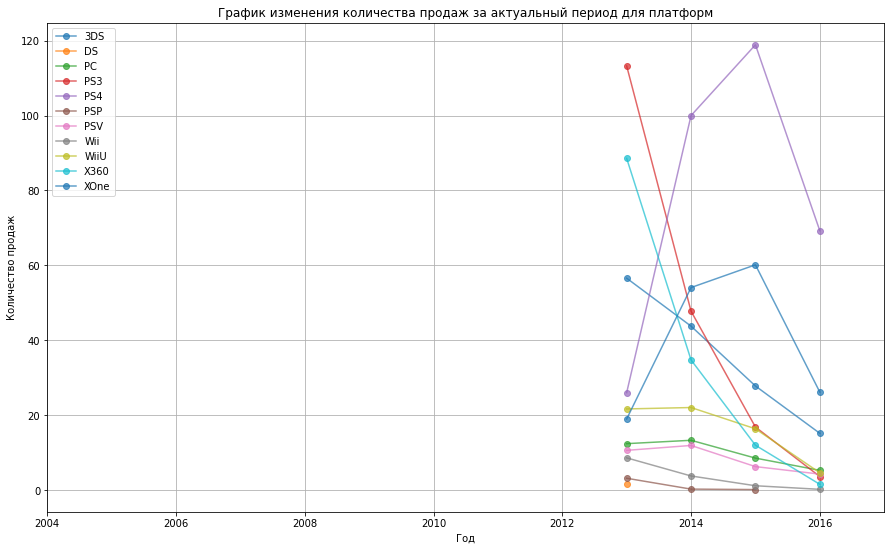

In [24]:
#выведем график по платформам за выбранный период
df_plat_year_filtered = df_actual.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
df_plat_year_filtered.plot(style='-o', grid=True, figsize=(15,9), alpha=0.7)
plt.xlim(2004, 2017) #устанавливаем границы для лучшей читаемости
plt.title('График изменения количества продаж за актуальный период для платформ')
plt.ylabel('Количество продаж')
plt.xlabel('Год')
plt.legend(loc='upper left')
plt.show()

На графике представлены продажи для каждой из платформ, которая соответствует нашему актуальному периоду. 

<a id='Потенциально_прибыльные_платформы'></a>
Определим потенциально прибыльные платформы.

Для этого обратимся к нашему графику изменения количества продаж по годам для платформ за актуальный период. Можно заметить, что есть только 3 высходящих платформы: PC, PS4 и Xbox One, в их пользу говорит несколько факторов:

* Ранее мы выявили средний "срок жизни" платформы - 10 лет, Xbox One и PS4 были запущены в 2013 году, в связи с чем их пик еще не пройден - можно ожидать дальнейшего увеличения продаж на этих платформах;
* PC на протяжении многих лет является стабильной платформой для игр, количество продаж которых на ней будет только расти;
* Количество продаж растет с 2013 по текущую дату исследования. 

<a id='Бокс-плот_мировых_продаж_по_платформам'></a>
Посмотрим на разброс значений мировых продаж по платформам за актуальный для нас период:

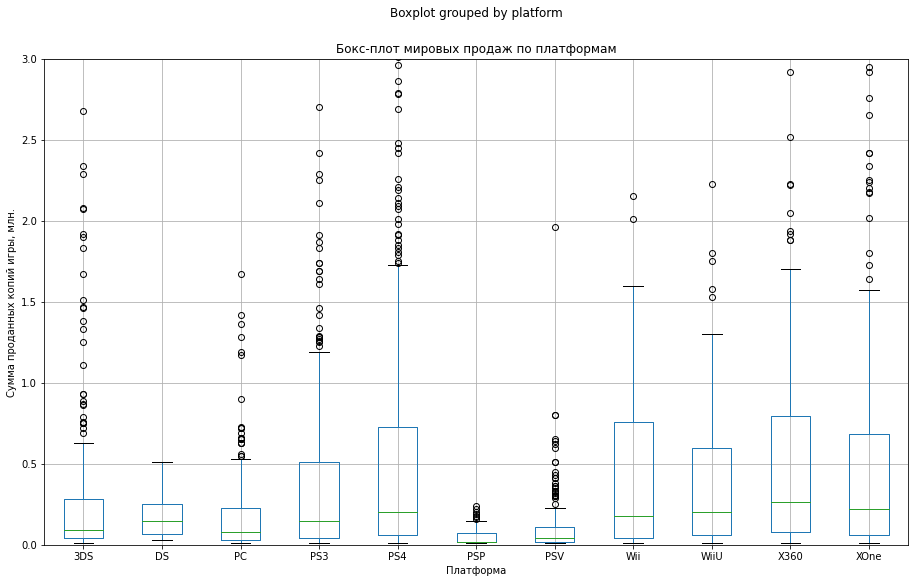

In [25]:
#строим боксплот
df_actual.boxplot(column='total_sales', by='platform', figsize=(15,9))
plt.ylim(0, 3) #ограничим Y для лучшей читаемости
plt.title('Бокс-плот мировых продаж по платформам')
plt.ylabel('Сумма проданных копий игры, млн.')
plt.xlabel('Платформа')
plt.show()

Благодаря бокс-плоту мы можем наглядно отметить распределение продаж по платформам:

* В абсолютном выражении по продажам лидерами являются: *PS3*, *PS4*, *X360* и *XOne* - их медиана продаж находится около 250 тыс., а верхний предел разброса около 1.75 млн. копий. 
* *DC* имеет крайне низкие продажи - ранее мы могли это заметить по графику продаж, есть смысл исключить платформу из анализа; 
* У каждой платформы, за исключением *DC*, есть "тайтлы", которые были крайне успешными относительно основной массы игр и сумма проданных копий которых выходит за верхний предел;
* Несмотря на рост продаж в последние годы, *PC* далек от лидеров, что может быть связано с большим количеством "тайтлов" на этой платформе, нацеленных на узкую аудиторию.

<a id='Корреляция_оценок_и_продаж'></a>
Рассмотрим, как влияют отзывы и оценки на продажи игр.

Для рассчетов возьмем *PS4*, как лидирующую платформу на момент исследования. 

In [26]:
#создадим отдельный датафрейм для PS4: продажи и оценки
df_ps4 = df_actual[df_actual['platform']=='PS4'][['total_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)
df_ps4.head()

,total_sales,critic_score,user_score
0,12.62,97.0,8.3
1,8.58,82.0,4.3
2,7.66,83.0,5.7
3,7.60,85.0,5.0
4,7.17,87.0,6.5


In [27]:
#посчитаем корреляцию
df_ps4.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.405895,-0.033625
critic_score,0.405895,1.000000,0.557654
user_score,-0.033625,0.557654,1.000000


Судя по коэффициенту корреляции:

* Оценка критиков имеет слабое влияние на продажи;
* Оценка пользователей не имеет влияния на продажи.

Визуализируем зависимость для наглядности: 

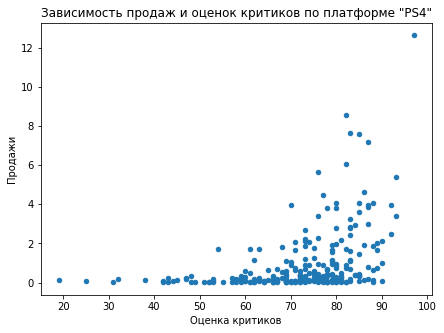

In [28]:
#построим график рассеяния по оценке критиков
df_ps4.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(7, 5))
plt.title('Зависимость продаж и оценок критиков по платформе "PS4"')
plt.ylabel('Продажи')
plt.xlabel('Оценка критиков')
plt.show()

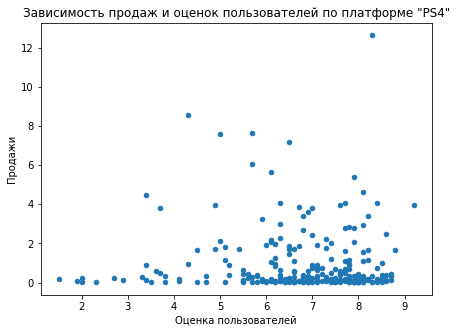

In [29]:
#построим график рассеяния по оценке пользователей
df_ps4.plot(kind='scatter', x='user_score', y='total_sales', figsize=(7, 5))
plt.title('Зависимость продаж и оценок пользователей по платформе "PS4"')
plt.ylabel('Продажи')
plt.xlabel('Оценка пользователей')
plt.show()

Соотнесем полученные выводы с корреляцией по другим платформам:

In [30]:
#создаем список нужных платформ
plat_list = df_actual['platform'].unique().tolist()
if 'PS4' in plat_list:
    plat_list.remove('PS4')
plat_list

['PS3', 'X360', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV', 'DS', 'PSP']

In [31]:
#выведем коэффициент корреляции продаж и оценок для каждой платформы за актуальный период таблицей
critic_corrs = []
user_corrs = []
for i in plat_list:
    #берем необходимы нам данные по каждой платформе из списка
    df_corr = df_actual[df_actual['platform'] == i][['total_sales', 'critic_score', 'user_score']]\
    .dropna().reset_index(drop=True)
    #вычисляем значения корреляции
    critic_corr = df_corr['total_sales'].corr(df_corr['critic_score'])
    user_corr = df_corr['total_sales'].corr(df_corr['user_score'])
    #записываем их в созданные списки
    critic_corrs.append(critic_corr)
    user_corrs.append(user_corr)
#формируем дф с полученными значениями
df_corrs = pd.DataFrame({'platform': plat_list, 'critic_corr': critic_corrs, 'user_corr': user_corrs})
display(df_corrs.sort_values(by='critic_corr', ascending=False))

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,platform,critic_corr,user_corr
3,XOne,0.410422,-0.094003
4,WiiU,0.379504,0.408692
1,X360,0.350345,-0.006238
2,3DS,0.339235,0.272990
0,PS3,0.333807,0.022691
7,PSV,0.254100,0.265478
6,PC,0.194124,-0.109235
5,Wii,NaN,NaN
8,DS,NaN,NaN
9,PSP,NaN,NaN


Отметим следующее по таблице:

* Корреляция оценок и продаж у *XOne*, *X360* и *PS3* схожа с *PS4*;
* *Wii*, *DS*, *PSP* не имеют корреляции в таблице, что может быть связано с низкой популярностью этих платформ в последние годы и отсутствием оценок;
* *3DS*, *PSV*, *WiiU* имеют одинаковое влияние на продажи как от критиков, так и от пользователей;
* У *PC* самая слабая зависимость продаж от оценок среди всех платформ.

<a id='Распределение_игр_по_жанрам'></a>
Обратим внимание на распределение игр по жанрам. 

In [32]:
#создадим дф с количеством игр на каждый жанр
df_genres = df_actual.groupby('genre')['name'].count().reset_index(name='num')
display(df_genres.sort_values(by='num', ascending=False))

,genre,num
0,Action,766
7,Role-Playing,292
1,Adventure,245
10,Sports,214
8,Shooter,187
3,Misc,155
6,Racing,85
2,Fighting,80
4,Platform,74
9,Simulation,62


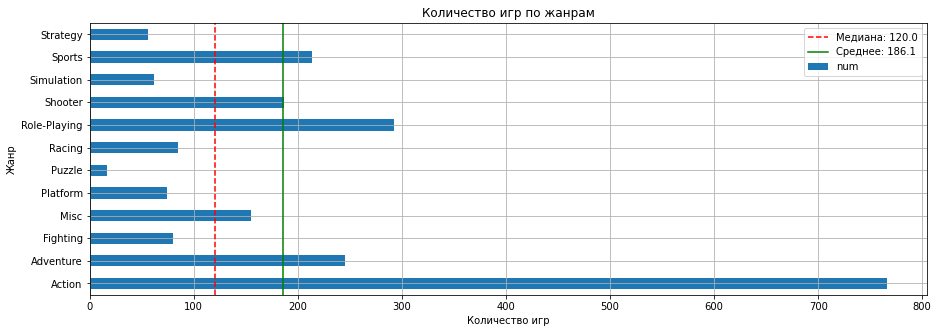

In [33]:
#визуализируем количество игр на жанр
ax = df_genres.plot(kind='barh', y='num', x='genre', grid=True, figsize=(15,5)) #основной график на оси
plt.title('Количество игр по жанрам')
plt.ylabel('Жанр')
plt.xlabel('Количество игр')
#добавим среднее и медиану на график
df_genres_median = df_genres['num'].median()
df_genres_mean = df_genres['num'].mean()
#добавляем вертикальные линии на ось
plt.axvline(df_genres_median, color='r', linestyle='--', label=f'Медиана: {df_genres_median}')
plt.axvline(df_genres_mean, color='g', linestyle='-', label=f'Среднее: {df_genres_mean:.1f}')
plt.legend()
plt.show()

Судя по полученным результатам и графику:

* Жанрами-лидерами по количеству выпущенных игр являются: *Action* (у которого абсолютное преимущество по рассматриваемому показателю), *Role-Playing*, *Adventure*, *Sports* ;
* Жанры, представленные сравнительно низким количеством игр: *Racing*, *Fighting*, *Platform*, *Simulation*, *Strategy*, *Puzzle*;
* Жанры, которые располагаются посередине - *Shooter*, *Misc* (стоит отметить, что в нашем случае *Misc* - это обозначение для жанров, которые не вошли в остальные группы).

Посмотрим на количество продаж по жанрам. 

In [34]:
df_genres_sales = df_actual.groupby('genre')['total_sales'].sum().reset_index(name='sum_sales')
display(df_genres_sales.sort_values(by='sum_sales', ascending=False))

,genre,sum_sales
0,Action,321.87
8,Shooter,232.98
10,Sports,150.65
7,Role-Playing,145.89
3,Misc,62.82
4,Platform,42.63
6,Racing,39.89
2,Fighting,35.31
1,Adventure,23.64
9,Simulation,21.76


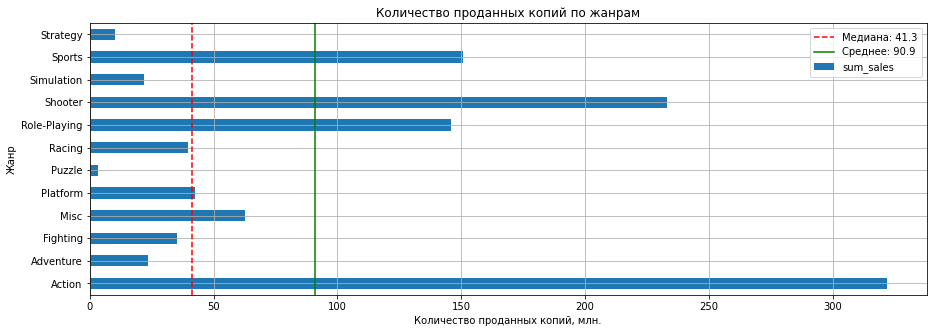

In [35]:
#визуализируем количество проданных копий на жанр
ax = df_genres_sales.plot(kind='barh', y='sum_sales', x='genre', grid=True, figsize=(15,5)) #основной график на оси
plt.title('Количество проданных копий по жанрам')
plt.ylabel('Жанр')
plt.xlabel('Количество проданных копий, млн.')
#добавим среднее и медиану на график
df_genres_sales_median = df_genres_sales['sum_sales'].median()
df_genres_sales_mean = df_genres_sales['sum_sales'].mean()
#добавляем вертикальные линии на ось
plt.axvline(df_genres_sales_median, color='r', linestyle='--', label=f'Медиана: {df_genres_sales_median:.1f}')
plt.axvline(df_genres_sales_mean, color='g', linestyle='-', label=f'Среднее: {df_genres_sales_mean:.1f}')
plt.legend()
plt.show()

Видим немного иную ситуацию:

* Жанры-лидеры по проданным копиям: *Action*, *Shooter*, *Sports*, *Role-Playing*;
* Жанры, представленные сравнительно низкими продажами: *Racing*, *Fighting*, *Adventure*, *Simulation*, *Strategy*, *Puzzle*;
* Жанры, которые располагаются посередине - *Misc*, *Platform*.

Выделим самые привлекательные жанры для продажи:

In [36]:
#для удобства добавим в дф с продажами столбец с количеством игр
df_genres_sales = df_genres_sales.merge(df_genres, on='genre')
#посчитаем количество продаж на игру
df_genres_sales['sales_per_game'] = ((df_genres_sales['sum_sales']/df_genres_sales['num']*1000000)).round(2)
display(df_genres_sales.sort_values(by='sales_per_game', ascending=False))

,genre,sum_sales,num,sales_per_game
8,Shooter,232.98,187,1245882.35
10,Sports,150.65,214,703971.96
4,Platform,42.63,74,576081.08
7,Role-Playing,145.89,292,499623.29
6,Racing,39.89,85,469294.12
2,Fighting,35.31,80,441375.00
0,Action,321.87,766,420195.82
3,Misc,62.82,155,405290.32
9,Simulation,21.76,62,350967.74
5,Puzzle,3.17,17,186470.59


Таким образом, чаще всего пользователи предпочитают шутеры, а *Action*, который был на вершине по количеству как игр, так и проданных копий, располагается в середине списка. 

**Вывод:**

Проведено исследование данных:

* Количество выпущенных игр растет с 1994 года и более равномерно распределяется после 2011 года;
* Для анализа выбран период с 2013 по 2016, так как он охватывает современные платформы, аудиторию и ее интересы; 
* Самые потенциально прибыльные платформы: PC, PS4 и Xbox One - показывают рост последние 3 года; 
* PS3, PS4, X360 и XOne имеют самый большой разброс по проданным копиям;
* В основном оценки критиков положительно слабо влияют на продажи, оценки пользователей чаще всего не влияют на продажи, исключениями являются *3DS*, *PSV*, *WiiU*, где оценки как критиков, так и пользователей имеют одинаковое влияние;
* Жанр-лидер по количеству игр и проданных копий - *Action*, однако жанр с самым большим количеством проданных копий на игру - *Shooter*. 

[Вернуться к содержанию](#Содержание)

<a id='Портрет-пользователя'></a>
## Портрет пользователя

<a id='Самые_популярные_платформы'></a>
Выделим топ-5 платформ для каждого региона.

In [37]:
#создадим общий дф с продажами по платформам для каждого региона
df_top_plat_dict = {}
#цикл на каждый регион
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    #считаем сумму продаж по платформам на регион
    df_top_plat = df_actual.groupby('platform')[i].sum().reset_index()
    df_top_plat_dict[i] = df_top_plat.set_index('platform')
#объединяем 3 региона в 1 дф по горизонтали
df_top_plat_dict = pd.concat(df_top_plat_dict, axis=1)
#сбрасываем индекс, чтобы платформы были столбцом
df_top_plat_dict.reset_index(inplace=True)
#избавляемся от мультииндексации в столбцах посредством смены имени столбцов
df_top_plat_dict.columns = ['platform', 'na_sales', 'eu_sales', 'jp_sales']
df_top_plat_dict

,platform,na_sales,eu_sales,jp_sales
0,3DS,38.20,30.96,67.81
1,DS,0.57,0.85,0.00
2,PC,11.11,25.36,0.00
3,PS3,63.50,67.81,23.35
4,PS4,108.74,141.09,15.96
5,PSP,0.00,0.17,3.29
6,PSV,5.04,6.10,18.59
7,Wii,6.56,5.93,0.05
8,WiiU,29.21,19.85,10.88
9,X360,81.66,42.52,0.51


У нас есть таблица с продажами по платформам для каждого региона, визуализируем ее:

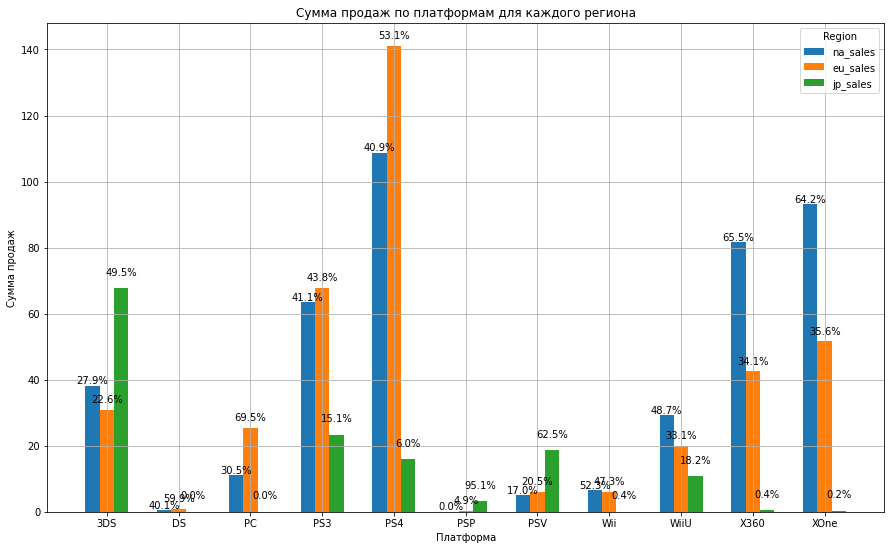

In [38]:
#построим один график на 3 региона
#обозначим ось и фигуру
fig, ax = plt.subplots(figsize=(15, 9))
#обозначим ширину для корректного отображения столбцов на графике
width = 0.2
#рассчитаем показатели для добавления долей на график
df_top_plat_dict['total_plat_sales'] = df_top_plat_dict['na_sales'] + df_top_plat_dict['eu_sales']\
+ df_top_plat_dict['jp_sales']
df_top_plat_dict['plat_part_na_sales'] = (df_top_plat_dict['na_sales'] / df_top_plat_dict['total_plat_sales']) * 100
df_top_plat_dict['plat_part_eu_sales'] = (df_top_plat_dict['eu_sales'] / df_top_plat_dict['total_plat_sales']) * 100
df_top_plat_dict['plat_part_jp_sales'] = (df_top_plat_dict['jp_sales'] / df_top_plat_dict['total_plat_sales']) * 100
#получаем список координат по оси Х для функции bar
x = range(len(df_top_plat_dict))
#используем enumerate для числа (будем корректировать ширину для каждой итерации) и самого обозначения региона
for i, region in enumerate(['na_sales', 'eu_sales', 'jp_sales']):
    #задаем координаты для столбцов
    bars = ax.bar([p + width*i for p in x], df_top_plat_dict[region], width=0.2, label=region)
    #добавляем подписи процентов
    for bar, percentage in zip(bars, df_top_plat_dict[f'plat_part_{region[:2]}_sales']):
        ax.annotate(f'{percentage:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    xytext=(0, i*5.5), 
                    textcoords="offset points",
                    ha='center', va='bottom')
plt.title('Сумма продаж по платформам для каждого региона')
plt.ylabel('Сумма продаж')
plt.xlabel('Платформа')
#задаем расположение подписей на оси Х, чтобы они соответствовали расположению столбцов
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(df_top_plat_dict['platform'])
plt.legend(title='Region')
plt.grid()
plt.show()

Для *NA* топ-5 платформами будут: 1.*PS4* (40,9%), 2.*XOne* (64,2%), 3.*X360* (65,5%), 4.*PS3* (41,1%), 5.*3DS* (27,9%).

Для *EU* топ-5 платформами будут: 1.*PS4* (53,1%), 2.*PS3* (43,8%), 3.*XOne* (35,6%), 4.*X360* (34,1%), 5.*3DS* (22,6%).

Для *JP* топ-5 платформами будут: 1.*3DS* (49,5%), 2.*PS3* (15,1%), 3.*PSV* (62,5%), 4.*PS4* (6%), 5.*WiiU* (18,2%).

В скобках: доля количества проданных копий игр по платформе для региона от всего количества проданных копий по платформе.

Таким образом, в *NA* доля проданных копий по топ-5 платформам самая высокая среди всех регионов. Доля японского рынка ниже американского и европейского по большей части платформ, а играми на *PC*, *DS*, *X360* и *XOne* там, судя по всему, совсем не интересуются. 

Также можно отметить, что за последние 3 года одним из лидеров во всех регионах остается *PS3*.

<a id='Самые_популярные_жанры'></a>
Определим топ-5 жанров для каждого региона.

In [39]:
#создадим общий дф с продажами по жанрам для каждого региона
df_top_genre_dict = {}
#цикл на каждый регион
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    #считаем сумму продаж по платформам на регион
    df_top_genre = df_actual.groupby('genre')[i].sum().reset_index()
    df_top_genre_dict[i] = df_top_genre.set_index('genre')
#объединяем 3 региона в 1 дф по горизонтали
df_top_genre_dict = pd.concat(df_top_genre_dict, axis=1)
#сбрасываем индекс, чтобы жанры были столбцом
df_top_genre_dict.reset_index(inplace=True)
#избавляемся от мультииндексации в столбцах посредством смены имени столбцов
df_top_genre_dict.columns = ['genre', 'na_sales', 'eu_sales', 'jp_sales']
df_top_genre_dict

,genre,na_sales,eu_sales,jp_sales
0,Action,126.05,118.13,40.49
1,Adventure,7.14,8.25,5.82
2,Fighting,15.55,8.55,7.65
3,Misc,27.49,20.04,9.20
4,Platform,18.14,15.58,4.79
5,Puzzle,0.83,1.00,1.18
6,Racing,12.96,20.19,2.30
7,Role-Playing,46.40,36.97,51.04
8,Shooter,109.74,87.86,6.61
9,Simulation,4.86,10.92,4.52


Представим данные наглядно: 

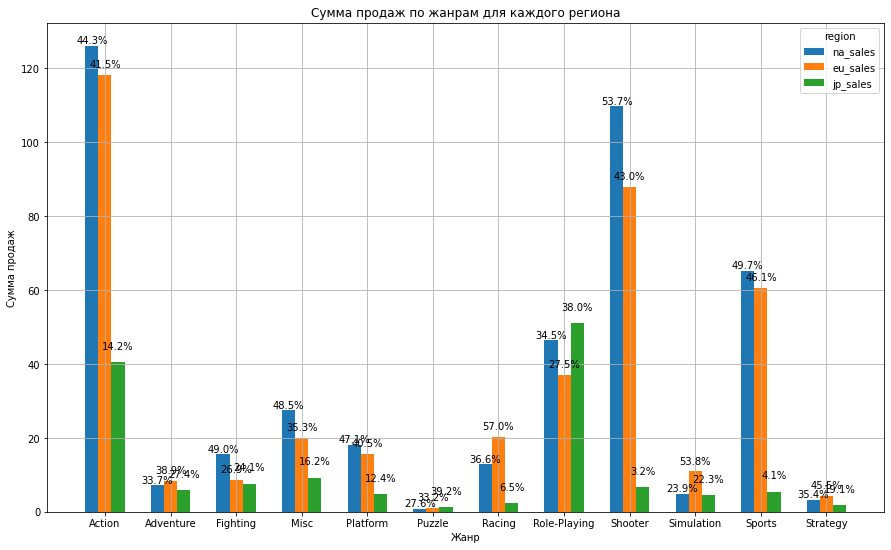

In [40]:
#построим один график на 3 региона
#обозначим ось и фигуру
fig, ax = plt.subplots(figsize=(15, 9))
#обозначим ширину для корректного отображения столбцов на графике
width = 0.2
#рассчитаем показатели для добавления долей на график
df_top_genre_dict['total_genre_sales'] = df_top_genre_dict['na_sales'] + df_top_genre_dict['eu_sales']\
+ df_top_genre_dict['jp_sales']
df_top_genre_dict['genre_part_na_sales'] = (df_top_genre_dict['na_sales'] / df_top_genre_dict['total_genre_sales']) * 100
df_top_genre_dict['genre_part_eu_sales'] = (df_top_genre_dict['eu_sales'] / df_top_genre_dict['total_genre_sales']) * 100
df_top_genre_dict['genre_part_jp_sales'] = (df_top_genre_dict['jp_sales'] / df_top_genre_dict['total_genre_sales']) * 100
#получаем список координат по оси Х для функции bar
x = range(len(df_top_genre_dict))
#используем enumerate для числа (будем корректировать ширину для каждой итерации) и самого обозначения региона
for i, region in enumerate(['na_sales', 'eu_sales', 'jp_sales']):
    #задаем координаты для столбцов
    bars = ax.bar([p + width*i for p in x], df_top_genre_dict[region], width=0.2, label=region)
    #добавляем подписи процентов
    for bar, percentage in zip(bars, df_top_genre_dict[f'genre_part_{region[:2]}_sales']):
        ax.annotate(f'{percentage:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    xytext=(0, i*5.5), 
                    textcoords="offset points",
                    ha='center', va='bottom')
plt.title('Сумма продаж по жанрам для каждого региона')
plt.ylabel('Сумма продаж')
plt.xlabel('Жанр')
#задаем расположение подписей на оси Х, чтобы они соответствовали расположению столбцов
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(df_top_genre_dict['genre'])
plt.legend(title='region')
plt.grid()
plt.show()

Для *NA* топ-5 жанрами будут: 1.*Action* (44,3%), 2.*Shooter* (53,7%), 3.*Sports* (49,7%), 4.*Role-Playing* (34,5%), 5.*Misc* (48,5%).

Для *EU* топ-5 жанрами будут: 1.*Action* (41,5%), 2.*Shooter* (43%), 3.*Sports* (46,1%), 4.*Role-Playing* (27,5%), 5.*Racing* (57%).

Для *JP* топ-5 жанрами будут: 1.*Role-Playing* (38%), 2.*Action* (14,2%), 3.*Misc* (16,2%), 4.*Fighting* (24,1%), 5.*Shooter* (3,2%).

В скобках: доля количества проданных копий игр по жанру для региона от всего количества проданных копий по жанру.

В *NA* самая высокая доля продаж копий игр по большей части жанров - в *JP* самая низкая, за исключением РПГ и пазлов. Можно попытаться определить предпочтения пользователей по тому или иному региону, но надо понимать, что доля продаж по жанрам сильно зависит от количества пользователей - очевидно, что в регионе *JP* пользователей значительно меньше, чем в *NA* и *EU*, значит и доля будет меньше. 

Возвращаясь к предпочтениям, лидирующим жанром по части суммарных продаж является *Action*, что мы уже выяснили при исследовании данных. 

<a id='Влияние_ESRB'></a>
Отдельно выясним, влияет ли рейтинг ESRB на продажи в каждом регионе. 

In [41]:
#создадим общий дф с продажами по играм с разным рейтингом ESRB для каждого региона
df_esrb_dict = {}
#цикл на каждый регион
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    #считаем сумму продаж по платформам на регион
    df_esrb = df_actual.groupby('rating')[i].sum().reset_index()
    df_esrb_dict[i] = df_esrb.set_index('rating')
#объединяем 3 региона в 1 дф по горизонтали
df_esrb_dict = pd.concat(df_esrb_dict, axis=1)
#сбрасываем индекс, чтобы жанры были столбцом
df_esrb_dict.reset_index(inplace=True)
#избавляемся от мультииндексации в столбцах посредством смены имени столбцов
df_esrb_dict.columns = ['rating', 'na_sales', 'eu_sales', 'jp_sales']
df_esrb_dict

,rating,na_sales,eu_sales,jp_sales
0,E,79.05,83.36,15.14
1,E10+,54.24,42.69,5.89
2,M,165.21,145.32,14.11
3,T,49.79,41.95,20.59
4,tbd,89.42,78.91,85.05


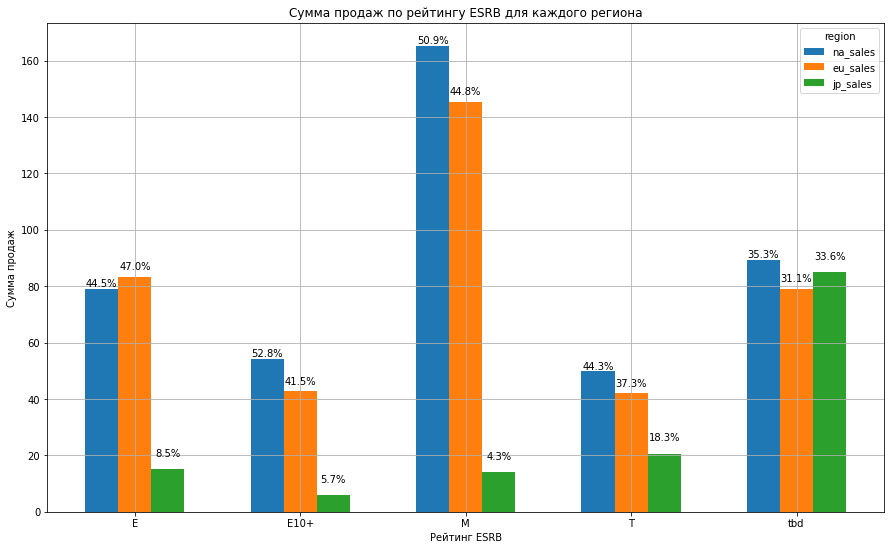

In [42]:
#построим один график на 3 региона
#обозначим ось и фигуру
fig, ax = plt.subplots(figsize=(15, 9))
#обозначим ширину для корректного отображения столбцов на графике
width = 0.2
#рассчитаем показатели для добавления долей на график
df_esrb_dict['total_esrb_sales'] = df_esrb_dict['na_sales'] + df_esrb_dict['eu_sales']\
+ df_esrb_dict['jp_sales']
df_esrb_dict['esrb_part_na_sales'] = (df_esrb_dict['na_sales'] / df_esrb_dict['total_esrb_sales']) * 100
df_esrb_dict['esrb_part_eu_sales'] = (df_esrb_dict['eu_sales'] / df_esrb_dict['total_esrb_sales']) * 100
df_esrb_dict['esrb_part_jp_sales'] = (df_esrb_dict['jp_sales'] / df_esrb_dict['total_esrb_sales']) * 100
#получаем список координат по оси Х для функции bar
x = range(len(df_esrb_dict))
#используем enumerate для числа (будем корректировать ширину для каждой итерации) и самого обозначения региона
for i, region in enumerate(['na_sales', 'eu_sales', 'jp_sales']):
    #задаем координаты для столбцов
    bars = ax.bar([p + width*i for p in x], df_esrb_dict[region], width=0.2, label=region)
    #добавляем подписи процентов
    for bar, percentage in zip(bars, df_esrb_dict[f'esrb_part_{region[:2]}_sales']):
        ax.annotate(f'{percentage:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    xytext=(0, i*5.5), 
                    textcoords="offset points",
                    ha='center', va='bottom')
plt.title('Сумма продаж по рейтингу ESRB для каждого региона')
plt.ylabel('Сумма продаж')
plt.xlabel('Рейтинг ESRB')
#задаем расположение подписей на оси Х, чтобы они соответствовали расположению столбцов
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(df_esrb_dict['rating'])
plt.legend(title='region')
plt.grid()
plt.show()

Сначала проверим, что обозначает каждая аббревиатура рейтинга ESRB:

* *AO* - Adults Only, для пользователей старше 18 лет;
* *EC* - Early Childhood, для пользователей до 3х лет;
* *RP* - Rating Pending, означает, что продукту еще не присвоен рейтинг, а сама аббревиатура используется для игр, которые еще официально не поступили в продажу;
* *E* - Everyone, для всех;
* *E10+* - Everyone 10 and older, для всех пользователей старше 10 лет;
* *M* - Mature, для пользователей старше 17 лет;
* *T* - Teen, для пользователей старше 13 лет.

Также нужно иметь в виду, что к каждому рейтингу причисляются дополнительные параметры отличные от минимального возраста пользователя, которые его характеризуют - это, например, наличие крови, сексуальные сцены, чрезмерное насилие и т.д.. 

После ознакомления со значениями аббревиатур рейтинга посмотрим на распределение продаж: 1.*M* - пользователи старше 17 лет, 2.*E*, который предназначен для всех групп пользователей, 3.*T* - пользователи старше 13, 4.*E10+* - пользователи старше 10. 

На первый взгляд, кажется нелогичным, что значения рейтинга идут в порядке уменьшения ограничения возраста, а не наоборот, ведь охват аудитории у них разный - но сомнения отпадают, если взять в расчет то, как проверяется дистрибуция игр с установленными рейтингами и возрастными ограничениями. 

Значения "tbd" представлены на графике, чтобы иметь представление о том, насколько искажен может быть окончательный вывод. 

Теперь выделим рейтинги по каждому региону отдельно: 

*NA*: 1.M (50,9%), 2.E (44,5%), 3.E10+ (52,8%), 4.T (44,3%).

*EU*: 1.M (44,8%), 2.E (47%), 3.E10+ (41,5%), 4.T (37,3%).

*JP*: 1.T (18,3%), 2.E (8,5%), 3.M (4,3%), 4.E10+ (5,7%). 

В скобках: доля количества проданных копий игр по рейтингу ESRB для региона от всего количества проданных копий по конкретному рейтингу.

Исходя из всего вышеописанного, сложно понять, влияет ли рейтинг ESRB на продажи. 

Будем считать, что рейтинг ESRB косвенно влияет на продажи, так как, скорее всего, есть люди, которые на него ориентируются при покупке или обязаны ориентироваться. 

**Вывод:**

Составлен портрет пользователя для каждого региона:

*NA*:

* Топ-5 платформ: 1.PS4 (40,9%), 2.XOne (64,2%), 3.X360 (65,5%), 4.PS3 (41,1%), 5.3DS (27,9%);
* Топ-5 жанров: 1.Action (44,3%), 2.Shooter (53,7%), 3.Sports (49,7%), 4.Role-Playing (34,5%), 5.Misc (48,5%);
* Распределение суммы проданных в регионе копий игр по рейтингам: 1.M (50,9%), 2.E (44,5%), 3.E10+ (52,8%), 4.T (44,3%).

*EU*:

* Топ-5 платформ: 1.PS4 (53,1%), 2.PS3 (43,8%), 3.XOne (35,6%), 4.X360 (34,1%), 5.3DS (22,6%);
* Топ-5 жанров: 1.Action (41,5%), 2.Shooter (43%), 3.Sports (46,1%), 4.Role-Playing (27,5%), 5.Racing (57%);
* Распределение суммы проданных в регионе копий игр по рейтингам: 1.M (44,8%), 2.E (47%), 3.E10+ (41,5%), 4.T (37,3%).

*JP*:

* Топ-5 платформ: 1.3DS (49,5%), 2.PS3 (15,1%), 3.PSV (62,5%), 4.PS4 (6%), 5.WiiU (18,2%);
* Топ-5 жанров: 1.Role-Playing (38%), 2.Action (14,2%), 3.Misc (16,2%), 4.Fighting (24,1%), 5.Shooter (3,2%);
* Распределение суммы проданных в регионе копий игр по рейтингам: 1.T (18,3%), 2.E (8,5%), 3.M (4,3%), 4.E10+ (5,7%).

[Вернуться к содержанию](#Содержание)

<a id='Проверка-гипотез'></a>
## Проверка гипотез

Приступим к проверке гипотез.

<a id='Гипотеза_1'></a>
Выясним, одинаковые ли средние пользовательские рейтинги платформ Xbox One и PC:

Сформулируем гипотезы (необходимо помнить, что H0 формулируется со знаком равенства, а H1 - наоборот):

H0: средние пользовательские рейтинги платформ Xbox One и PC равны;

H1: средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [43]:
#для проверки гипотезы будем использовать двухсторонний двухвыборочный Т-тест для независимых выборок

alpha = 0.05 #возьмем порог в 5%, т.к. это один из стандартных уровней и у нас нет необходимости в 1% для точности
#или, наоборот, в 10%

results = st.ttest_ind(df_actual[df_actual['platform']=='XOne']['user_score'],\
                       df_actual[df_actual['platform']=='PC']['user_score'], nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги выбранных платформ значимо различаются')
else:
    print('Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги достигают запланированных показателей')

p-значение: 0.14012658403611503
Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги достигают запланированных показателей


Посмотрим на средние значения в нашей выборке:

In [44]:
print('Средний пользовательский рейтинг на платформе XOne:',\
      df_actual[df_actual['platform']=='XOne']['user_score'].dropna().mean())
print('Средний пользовательский рейтинг на платформе PC:',\
      df_actual[df_actual['platform']=='PC']['user_score'].dropna().mean())

Средний пользовательский рейтинг на платформе XOne: 6.521428571428572
Средний пользовательский рейтинг на платформе PC: 6.2696774193548395


В наших данных среднее по этим платформам не сильно различается, в связи с чем нулевая гипотеза не была отвергнута. 

<a id='Гипотеза_2'></a>
Проверим, разные ли средние пользовательские рейтинги жанров Action и Sports:

H0: cредние пользовательские рейтинги жанров Action и Sports равны;

H1: средние пользовательские рейтинги жанров Action и Sports не равны.

In [45]:
#для проверки гипотезы будем использовать двухсторонний двухвыборочный Т-тест для независимых выборок

alpha = 0.05 #возьмем порог в 5%, т.к. это один из стандартных уровней и у нас нет необходимости в 1% для точности
#или, наоборот, в 10%

results = st.ttest_ind(df_actual[df_actual['genre']=='Action']['user_score'],\
                       df_actual[df_actual['genre']=='Sports']['user_score'], nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги выбранных жанров значимо различаются')
else:
    print('Не получилось отвергнуть нулевую гипотезу: средние пользовательские рейтинги достигают запланированных показателей')

p-значение: 1.0517832389139422e-27
Отвергаем нулевую гипотезу: средние пользовательские рейтинги выбранных жанров значимо различаются


Альтернативная гипотеза оказалась более правдоподобной, посмотрим на средние значения в нашей выборке:

In [46]:
print('Средний пользовательский рейтинг по жанру Action:',\
      df_actual[df_actual['genre']=='Action']['user_score'].dropna().mean())
print('Средний пользовательский рейтинг по жанру Sports:',\
      df_actual[df_actual['genre']=='Sports']['user_score'].dropna().mean())

Средний пользовательский рейтинг по жанру Action: 6.837532133676092
Средний пользовательский рейтинг по жанру Sports: 5.238124999999999


В нашей выборке средние значения оценок действительно не равны. 

**Вывод:**

Проверены 2 гипотезы:

* Cредние пользовательские рейтинги платформ Xbox One и PC расположены близко или могут быть равны, H0 не отвергнута;
* Вероятно, средние пользовательские рейтинги жанров Action и Sports не равны, H0 отвергнута.

[Вернуться к содержанию](#Содержание)

## Общий вывод

На основе предоставленных данных было исследовано:

* Рост количества выпускаемых игр начинается с 1994, а после 2011 количество заметно падает и держится практически равномерно;
* Для дальнейшего анализа выбран период с 2013 по 2016, так как он охватывает современные платформы, аудиторию и их предпочтения;
* Самые потенциально прибыльные платформы: PC, PS4 и Xbox One - показывают рост последние 3 года;
* PS3, PS4, X360 и XOne имеют самый большой разброс по количеству проданных копий на "тайтл";
* В основном оценки критиков положительно слабо влияют на продажи, оценки пользователей чаще всего не влияют на продажи, за исключением 3DS, PSV, WiiU - имеют одинаковое влияние на продажи как от критиков, так и от пользователей;
* Жанр-лидер по количеству игр и проданных копий - *Action*, однако жанр с самым большим количеством проданных копий на игру - *Shooter*.

Составлен портрет пользователя по каждому региону:

* *NA*: самая востребованная платформа - PS4 (108,74 млн. проданных копий игр в регионе), самый востребованный жанр - Action (580.04 млн. проданных копий игр в регионе), распределение продаж в регионе по рейтингам ESRB: 1.M , 2.E , 3.E10+ , 4.T;

* *EU*: самая востребованная платформа - PS4 (141,09 млн. проданных копий игр в регионе), самый востребованный жанр - Action (372.58 млн. проданных копий игр в регионе), распределение продаж в регионе по рейтингам ESRB: 1.M, 2.E, 3.E10+, 4.T;

* *JP*: самая востребованная платформа - 3DS (67,81 млн. проданных копий игр в регионе), самый востребованный жанр - Role-Playing, распределение продаж в регионе по рейтингам ESRB: 1.T, 2.E, 3.M, 4.E10+;

Также проверены 2 гипотезы:

* Вероятно, средние пользовательские рейтинги платформ Xbox One и PC могут быть равны, H0 не отвергнута;
* Вероятно, средние пользовательские рейтинги жанров Action и Sports не равны, H0 отвергнута - отдельно от других факторов выбор жанра в пользу Action для продажи выглядит приоритетнее.

Рекомендуемая стартегия продаж на 2017 год: 

* Приоритетные регионы: *NA*, *EU* - *JP* представляет собой меньший рынок, а также имеет альтернативный пик платформ и жанров;
* Платформа: *PC*, *XOne*, *PS4* - растущие по продажам платформы;
* Жанр: *Action*, *Shooter* - самые продаваемые жанры;
* Рейтинг ESRB: *M*, *E* - занимают первые места по продажам.

[Вернуться к содержанию](#Содержание)